# Analysis of Teams and winning! #


In [3]:
# imports and setup
import scipy as sc
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)


In [4]:
df_all = pd.read_csv('Data/Team-stats/Cleaned-dataframe')
# drop the unnamed column
df_all = df_all.drop(df_all.columns[0], 1)
df_all = df_all.drop(df_all.columns[0], 1)
df_all.head(15)

TEAM  GP   W   L   WIN%   MIN    PTS   FGM   FGA   FG%  \
0                Utah Jazz  51  38  13  0.745  48.2  116.8  41.3  88.5  46.7   
1             Phoenix Suns  50  36  14  0.720  48.6  114.6  43.0  87.9  48.9   
2            Brooklyn Nets  52  36  16  0.692  48.5  119.0  43.4  87.9  49.4   
3       Philadelphia 76ers  51  35  16  0.686  48.5  114.0  41.5  86.9  47.7   
4     Los Angeles Clippers  52  34  18  0.654  48.0  114.6  41.9  87.0  48.2   
5           Denver Nuggets  51  33  18  0.647  48.6  115.5  43.7  89.4  48.9   
6          Milwaukee Bucks  50  32  18  0.640  48.1  119.3  44.5  91.1  48.8   
7       Los Angeles Lakers  51  32  19  0.627  48.5  110.0  40.9  85.8  47.6   
8   Portland Trail Blazers  50  30  20  0.600  48.1  115.2  40.5  90.9  44.6   
9         Dallas Mavericks  50  28  22  0.560  48.1  111.4  40.6  86.7  46.9   
10       Memphis Grizzlies  49  26  23  0.531  48.2  112.5  42.8  91.8  46.6   
11       Charlotte Hornets  50  26  24  0.520  48.2  110.8  40.2  87.8  45.8   
12           Atlanta Hawks  52  27  25  0.519  48.4  113.4  40.4  87.3  46.3   
13              Miami Heat  51  26  25  0.510  48.4  106.5  38.6  83.8  46.0   
14          Boston Celtics  52  26  26  0.500  48.2  111.9  41.4  88.5  46.8   

    ...  BLKA    PF   PFD  +/-   SEASON  Playoffs  Conf Semi  Conf Final  \
0   ...   3.9  18.9  19.2  9.4  2020-21         0          0           0   
1   ...   3.7  19.6  18.2  6.9  2020-21         0          0           0   
2   ...   4.6  19.1  18.8  4.8  2020-21         0          0           0   
3   ...   4.6  20.5  21.3  5.0  2020-21         0          0           0   
4   ...   3.8  19.3  17.9  6.6  2020-21         0          0           0   
5   ...   4.4  18.8  19.2  5.6  2020-21         0          0           0   
6   ...   4.8  17.1  18.3  6.2  2020-21         0          0           0   
7   ...   4.4  19.0  21.5  4.3  2020-21         0          0           0   
8   ...   4.5  19.3  18.9  0.1  2020-21         0          0           0   
9   ...   3.7  19.5  20.2  1.9  2020-21         0          0           0   
10  ...   5.5  18.5  18.2  1.4  2020-21         0          0           0   
11  ...   4.9  18.1  18.9 -0.9  2020-21         0          0           0   
12  ...   5.3  19.9  20.2  1.8  2020-21         0          0           0   
13  ...   4.2  18.9  20.1 -0.9  2020-21         0          0           0   
14  ...   4.7  20.5  19.2  1.6  2020-21         0          0           0   

    Finals  Champs  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0  
5        0       0  
6        0       0  
7        0       0  
8        0       0  
9        0       0  
10       0       0  
11       0       0  
12       0       0  
13       0       0  
14       0       0  

[15 rows x 33 columns]

In [5]:
# Find the descriptive stats about the dataset
df_all.describe()

GP           W           L        WIN%         MIN         PTS  \
count  626.000000  626.000000  626.000000  626.000000  626.000000  626.000000   
mean    79.185304   39.592652   39.592652    0.499756   48.355272  100.810543   
std      7.620447   12.582981   12.492246    0.149930    0.182022    6.785624   
min     49.000000    7.000000    9.000000    0.106000   48.000000   84.200000   
25%     82.000000   30.000000   30.000000    0.390000   48.200000   95.825000   
50%     82.000000   41.000000   39.000000    0.512000   48.400000   99.500000   
75%     82.000000   49.000000   49.000000    0.610000   48.500000  104.975000   
max     82.000000   73.000000   72.000000    0.890000   49.000000  119.300000   

              FGM         FGA         FG%         3PM  ...         BLK  \
count  626.000000  626.000000  626.000000  626.000000  ...  626.000000   
mean    37.576677   82.833706   45.357668    7.538658  ...    4.902875   
std      2.338259    3.837249    1.595748    2.772714  ...    0.800515   
min     32.400000   74.300000   40.800000    2.600000  ...    2.400000   
25%     35.925000   80.000000   44.300000    5.500000  ...    4.300000   
50%     37.300000   82.400000   45.300000    6.900000  ...    4.900000   
75%     39.000000   85.600000   46.400000    9.300000  ...    5.400000   
max     44.500000   94.000000   50.400000   16.900000  ...    8.200000   

             BLKA          PF         PFD         +/-    Playoffs   Conf Semi  \
count  626.000000  626.000000  626.000000  626.000000  626.000000  626.000000   
mean     4.904633   20.923642   15.829712   -0.006230    0.511182    0.255591   
std      0.703928    1.687095    8.804678    4.518904    0.500275    0.436542   
min      3.000000   16.600000    0.000000  -13.900000    0.000000    0.000000   
25%      4.400000   19.700000   17.950000   -3.100000    0.000000    0.000000   
50%      4.900000   20.900000   20.000000    0.100000    1.000000    0.000000   
75%      5.400000   22.100000   21.200000    3.375000    1.000000    1.000000   
max      6.900000   26.700000   25.700000   11.600000    1.000000    1.000000   

       Conf Final      Finals      Champs  
count  626.000000  626.000000  626.000000  
mean     0.129393    0.063898    0.031949  
std      0.335903    0.244766    0.176005  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

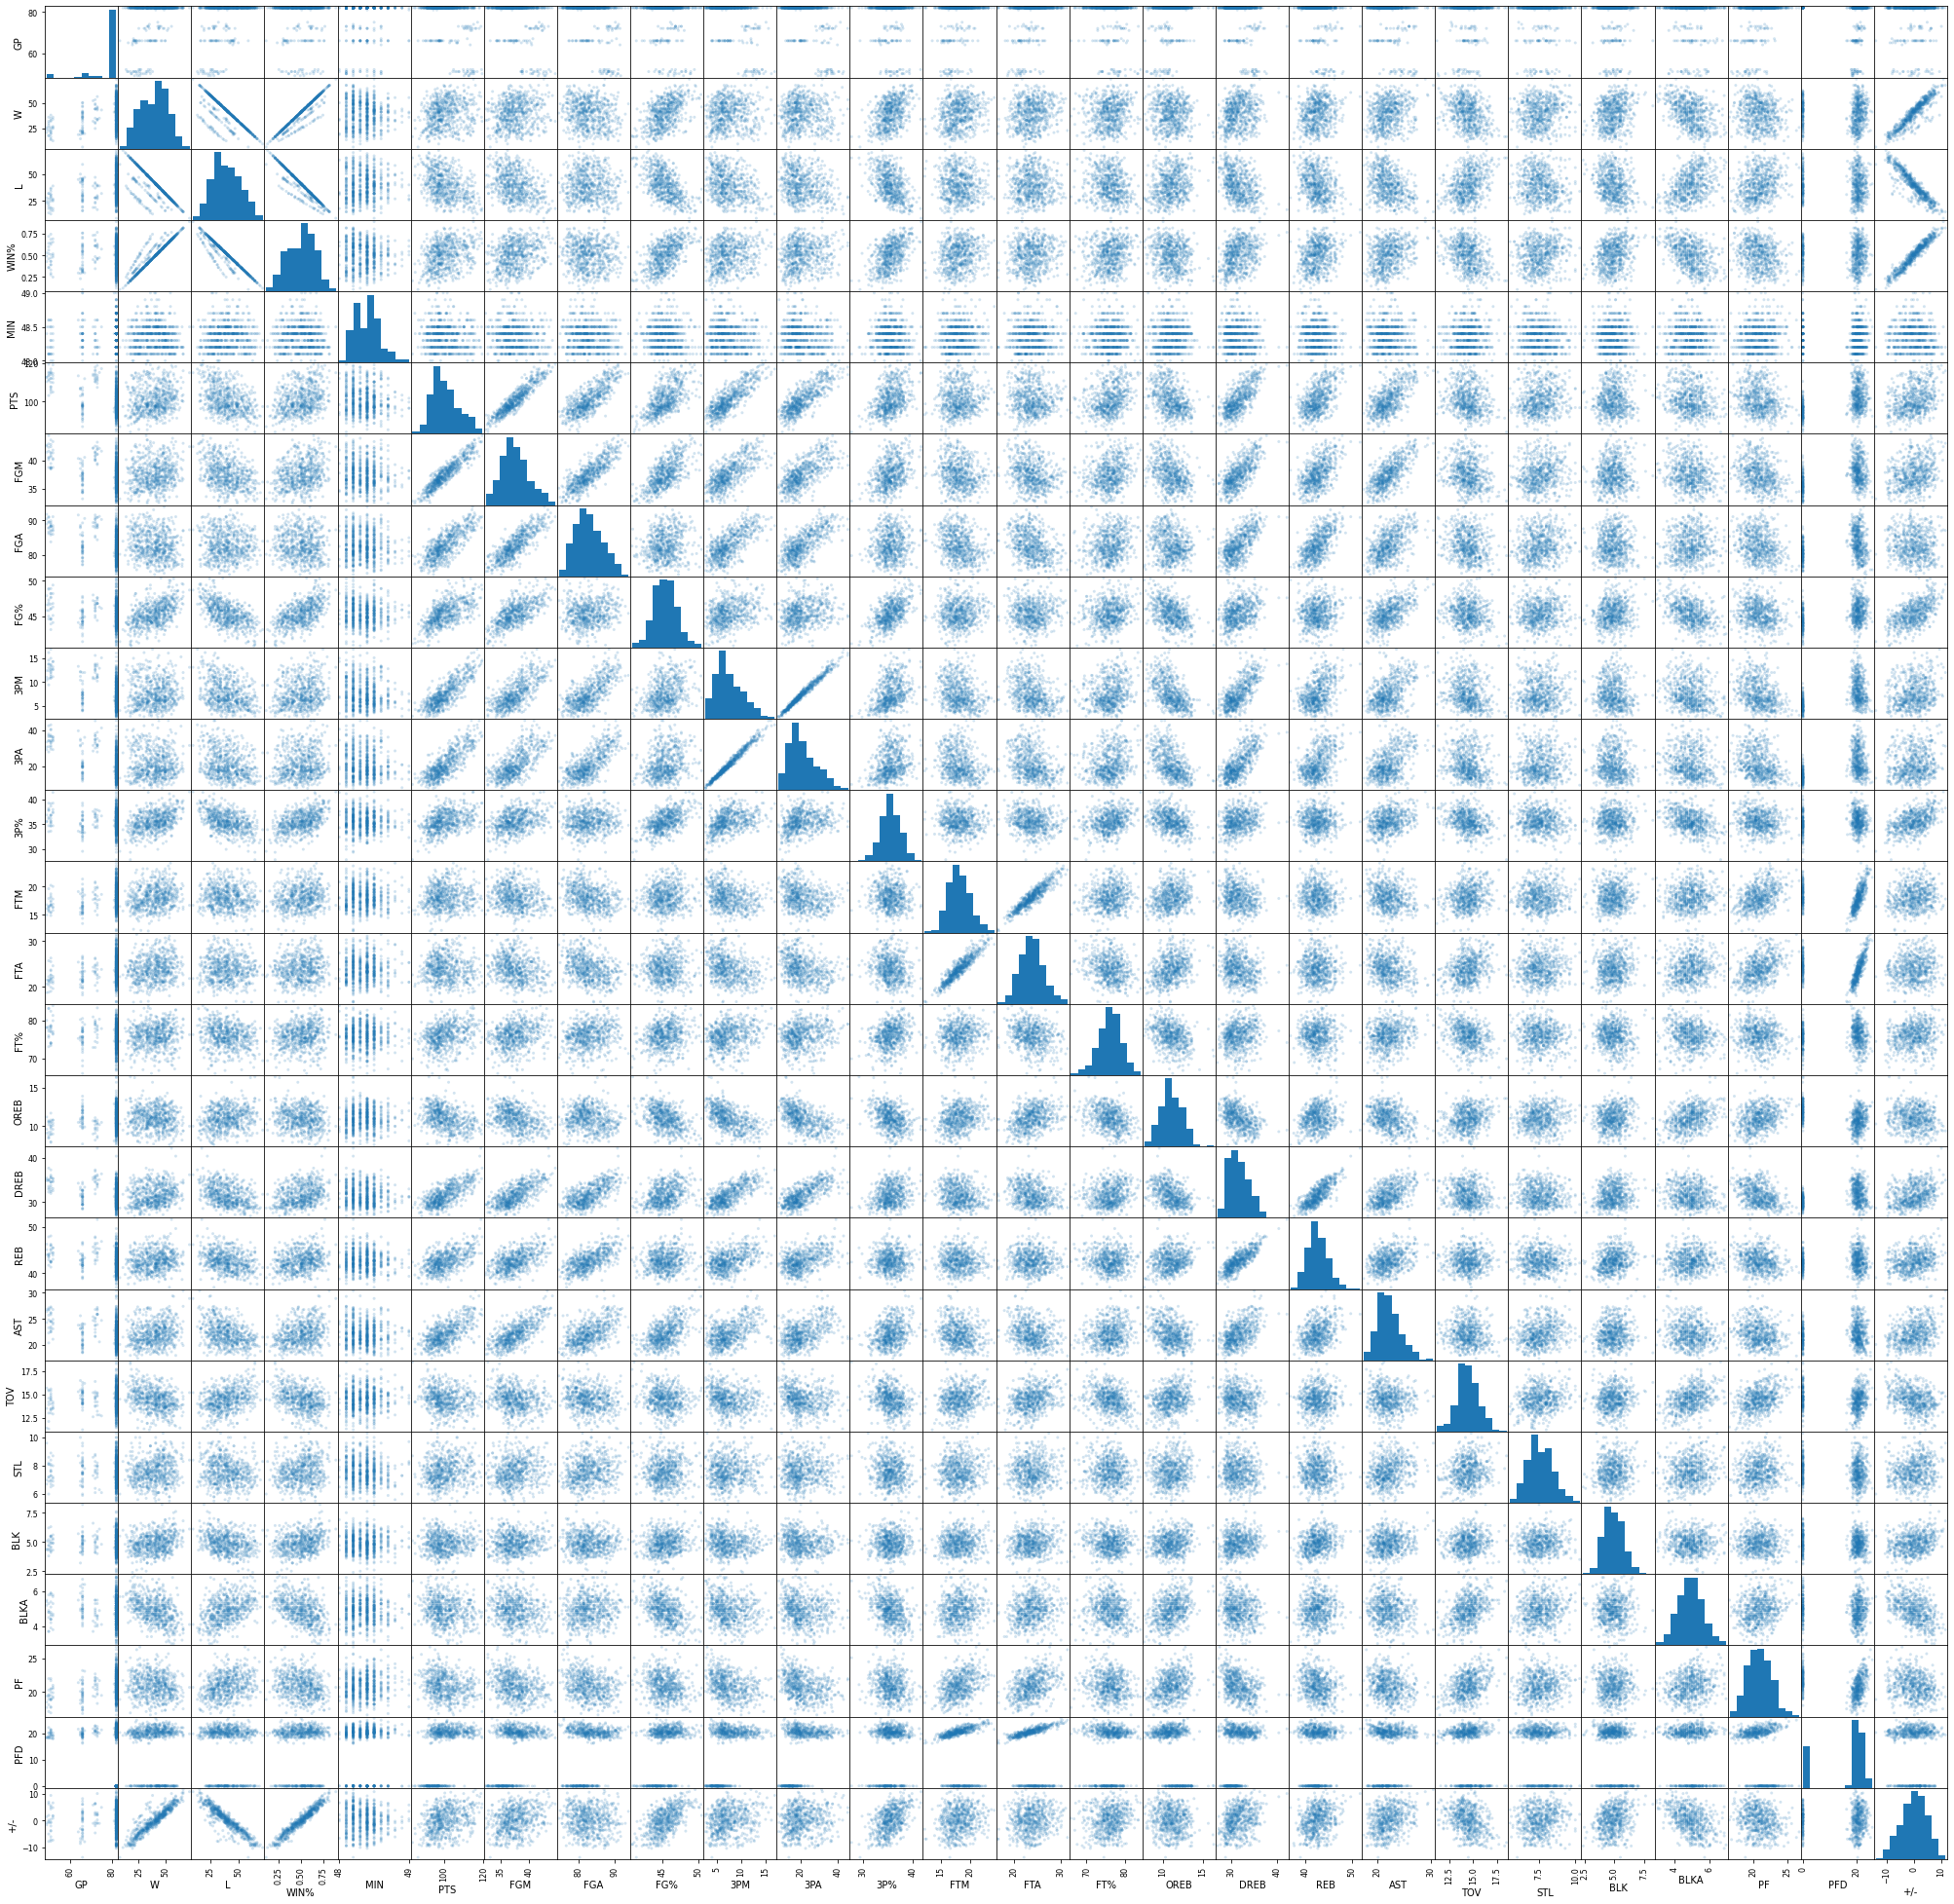

In [9]:
# plot the correlation matrix to visualize relationships
scatter_matrix(df_all.loc[:, 'GP':'+/-'], alpha=0.2, figsize = (35, 35))
print()

In [5]:
# Compute the correlation of all the variables
corr = df_all.corr()
corr.head()

GP         W         L      WIN%       MIN       PTS       FGM  \
GP    1.000000  0.314672  0.293057  0.016765  0.034938 -0.356711 -0.337616   
W     0.314672  1.000000 -0.815309  0.950480 -0.017748  0.190426  0.160262   
L     0.293057 -0.815309  1.000000 -0.947157  0.039189 -0.409407 -0.367377   
WIN%  0.016765  0.950480 -0.947157  1.000000 -0.023823  0.315221  0.278929   
MIN   0.034938 -0.017748  0.039189 -0.023823  1.000000 -0.102499 -0.087001   

           FGA       FG%       3PM  ...       BLK      BLKA        PF  \
GP   -0.354296 -0.121127 -0.444946  ... -0.017188 -0.038011  0.262836   
W    -0.166237  0.504776  0.052526  ...  0.249897 -0.432089 -0.133877   
L    -0.048682 -0.582331 -0.324331  ... -0.262197  0.412040  0.295183   
WIN% -0.063698  0.575962  0.195408  ...  0.267236 -0.448280 -0.223473   
MIN  -0.071279 -0.060182 -0.117259  ... -0.003947 -0.007995  0.079779   

           PFD       +/-  Playoffs  Conf Semi  Conf Final    Finals    Champs  
GP   -0.163322  0.018312  0.206784   0.117044    0.077502  0.051972  0.034946  
W    -0.035754  0.918787  0.800732   0.644654    0.508390  0.352893  0.276807  
L    -0.063615 -0.914289 -0.680407  -0.577938   -0.464806 -0.323752 -0.257501  
WIN%  0.013106  0.967987  0.769945   0.634421    0.504311  0.350877  0.276963  
MIN  -0.008803 -0.045857  0.019558  -0.091486   -0.085755 -0.039894 -0.075185  

[5 rows x 31 columns]

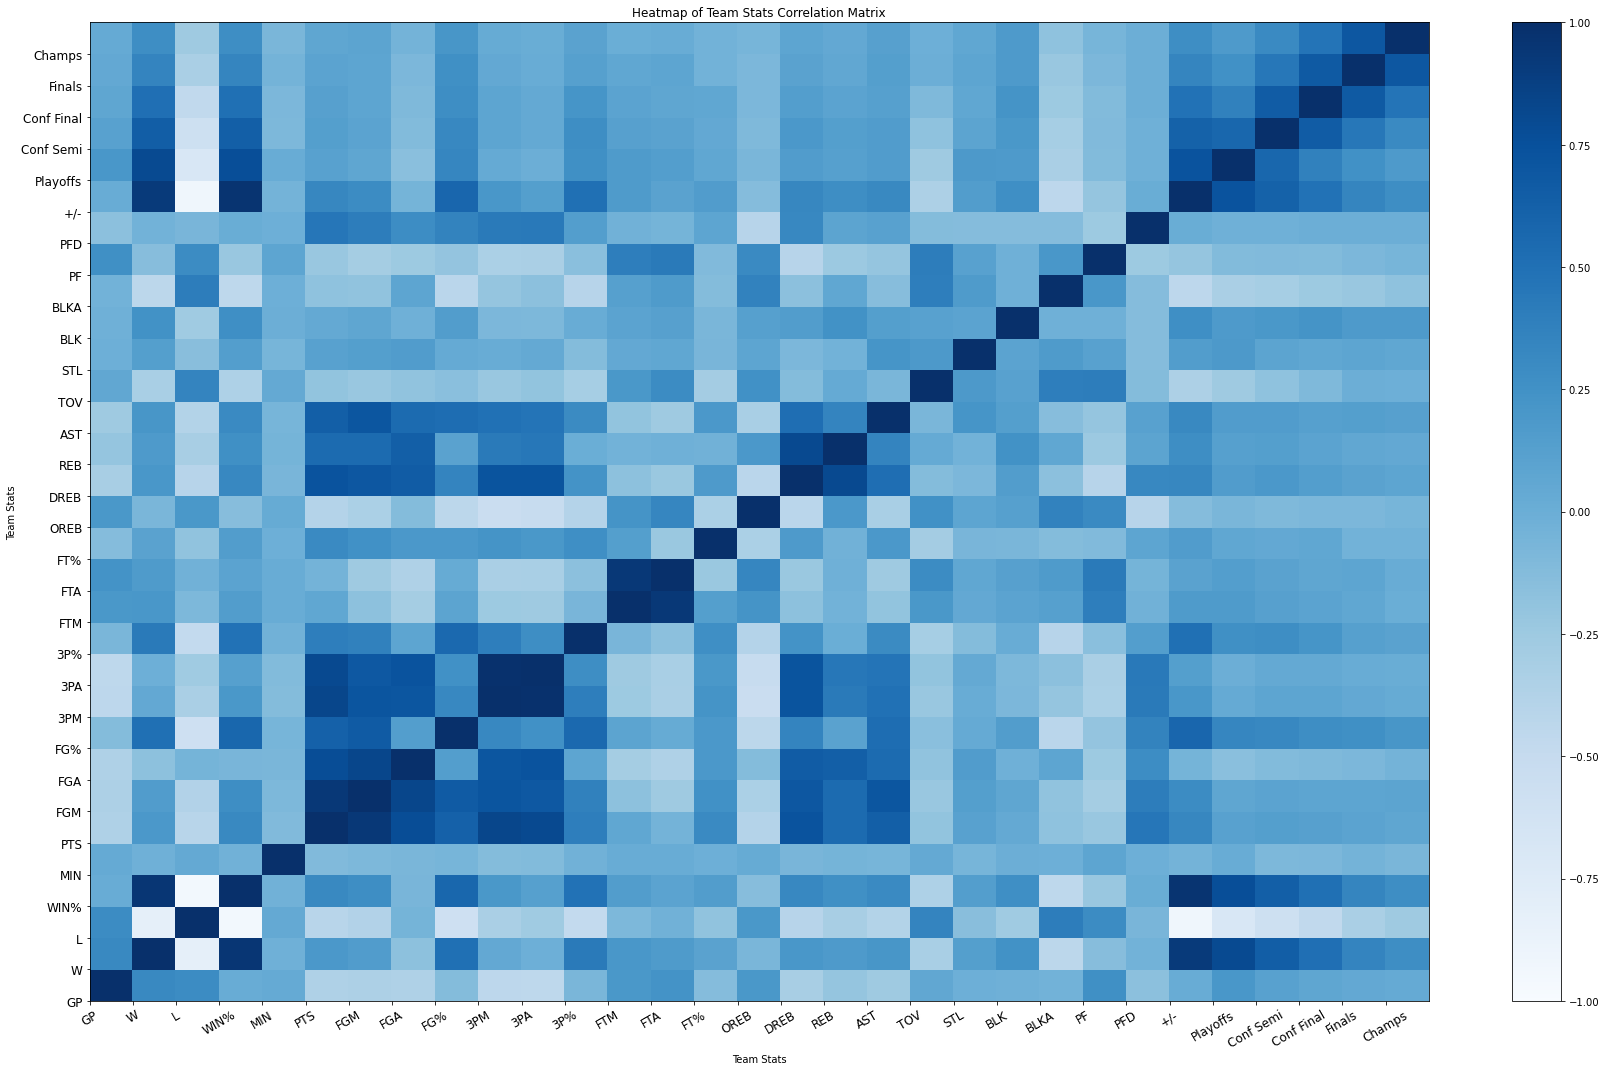

In [6]:
# Heat Map
names = corr.columns.to_list()
fig_hm = plt.figure(figsize=(30, 18))
heatmap = plt.pcolor(corr, vmin=-1, vmax=1, cmap=plt.cm.Blues)
plt.xticks(range(corr.shape[0]), labels=names, rotation=30, fontsize='large')
plt.yticks(range(corr.shape[0]), labels=names, fontsize='large')
plt.title("Heatmap of Team Stats Correlation Matrix")
plt.xlabel("Team Stats")
plt.ylabel("Team Stats")
plt.colorbar(heatmap)
plt.show()

**COMMENTS:** Unfortunately, this analysis isn't very telling for championships. None of our data have a strong correlation with winning championships. At the very best, we can say that Blocks allowed has a fairly strong negative correlation with winning championships.

<br>

For winning alone, the single best indicator, is plus/minus, a stat that tracks the difference in points from when a player enters and exits the game. This stat may suggest how effective the team is at growing/maintaining leads. It most likely reflects team chemistry and how effective different players mesh together.

<br>

In terms of other interesting insights, 3-pointers attempted, 3-pointers made, defensive rebounds, rebounds, and assists all had strong correlations with points, but offensive rebounds had a negative correlation. This indicates that offensive boards don't necessarily lead to more points!



In [7]:
# Let's do a similar analysis on only championship winners
df_champs = df_all.loc[df_all["Champs"] == 1]
df_champs.head()

TEAM  GP   W   L   WIN%   MIN    PTS   FGM   FGA   FG%  \
43      Los Angeles Lakers  71  52  19  0.732  48.1  113.4  42.3  88.3  48.0   
87         Toronto Raptors  82  58  24  0.707  48.5  114.4  42.2  89.1  47.4   
99   Golden State Warriors  82  58  24  0.707  48.1  113.5  42.8  85.1  50.3   
129  Golden State Warriors  82  67  15  0.817  48.2  115.9  43.1  87.1  49.5   
155    Cleveland Cavaliers  82  57  25  0.695  48.4  104.3  38.7  84.0  46.0   

     ...  BLKA    PF   PFD   +/-   SEASON  Playoffs  Conf Semi  Conf Final  \
43   ...   3.7  20.7  21.7   5.8  2019-20         1          1           1   
87   ...   4.5  21.0  20.5   6.1  2018-19         1          1           1   
99   ...   3.7  19.6  18.5   6.0  2017-18         1          1           1   
129  ...   3.8  19.3  19.4  11.6  2016-17         1          1           1   
155  ...   4.4  20.3  20.6   6.0  2015-16         1          1           1   

     Finals  Champs  
43        1       1  
87        1       1  
99        1       1  
129       1       1  
155       1       1  

[5 rows x 33 columns]

### Compare Median Champs Stats with Utah Jazz Stats ###

In [116]:
# Get summary stats of champs
df_champs_stats = df_champs.describe()
df_champs_med = df_champs_stats.iloc[5, :]

# Compare with Utah 2021 season stats
df_utah_21 = df_all.loc[(df_all["TEAM"] == 'Utah Jazz') & (df_all['SEASON'] == '2020-21'), :]
df_med_compare = df_utah_21.append(df_champs_med)
df_med_compare.iloc[1, 0] = 'Champs Median'

# Repeat analysis, but with all teams
df_all_stats = df_all.describe()
df_all_med = df_all_stats.iloc[5, :]
df_med_compare = df_med_compare.append(df_all_med)
df_med_compare.iloc[2,0] = 'All Median'

# Compare utah jazz to median values
mask_champ = df_med_compare.iloc[0] > df_med_compare.iloc[1]
df_med_compare = df_med_compare.append(mask_champ, ignore_index=True)
df_med_compare.iloc[3, 0] = 'Champs Comparison'

mask_all = df_med_compare.iloc[0] > df_med_compare.iloc[2]
df_med_compare = df_med_compare.append(mask_all, ignore_index=True)
df_med_compare.iloc[4, 0] = 'All Comparison'

# Display results
df_med_compare.loc[:, 'GP':'+/-'].apply(add_highlights)
pd.set_option('display.max_columns', None)
df_med_compare.to_csv('Data/Team-stats/Champs-Jazz-Comparison.csv')
df_med_compare.head()


TEAM    GP     W     L   WIN%   MIN    PTS    FGM    FGA  \
0          Utah Jazz  51.0  38.0  13.0  0.745  48.2  116.8  41.30  88.50   
1      Champs Median  82.0  58.0  23.5  0.707  48.2  101.5  38.35  82.45   
2         All Median  82.0  41.0  39.0  0.512  48.4   99.5  37.30  82.40   
3  Champs Comparison   0.0   0.0   0.0  1.000   0.0    1.0   1.00   1.00   
4     All Comparison   0.0   0.0   0.0  1.000   0.0    1.0   1.00   1.00   

    FG%   3PM    3PA    3P%    FTM    FTA    FT%   OREB  DREB   REB   AST  \
0  46.7  16.9  43.00  39.20  17.30  21.90  78.70  10.80  37.3  48.1  23.5   
1  47.4   7.3  19.05  36.25  18.15  24.20  75.95  10.45  31.9  43.4  23.0   
2  45.3   6.9  19.30  35.50  18.00  23.75  76.00  11.00  31.3  42.5  21.9   
3   0.0   1.0   1.00   1.00   0.00   0.00   1.00   1.00   1.0   1.0   1.0   
4   1.0   1.0   1.00   1.00   0.00   0.00   1.00   0.00   1.0   1.0   1.0   

    TOV   STL  BLK  BLKA    PF    PFD   +/-   SEASON  Playoffs  Conf Semi  \
0  14.0  6.50  5.5  3.90  18.9  19.20  9.40  2020-21       0.0        0.0   
1  14.4  7.85  5.4  4.25  20.3  20.25  6.05      NaN       1.0        1.0   
2  14.5  7.50  4.9  4.90  20.9  20.00  0.10      NaN       1.0        0.0   
3   0.0  0.00  1.0  0.00   0.0   0.00  1.00    False       0.0        0.0   
4   0.0  0.00  1.0  0.00   0.0   0.00  1.00    False       0.0        0.0   

   Conf Final  Finals  Champs  
0         0.0     0.0     0.0  
1         1.0     1.0     1.0  
2         0.0     0.0     0.0  
3         0.0     0.0     0.0  
4         0.0     0.0     0.0

/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


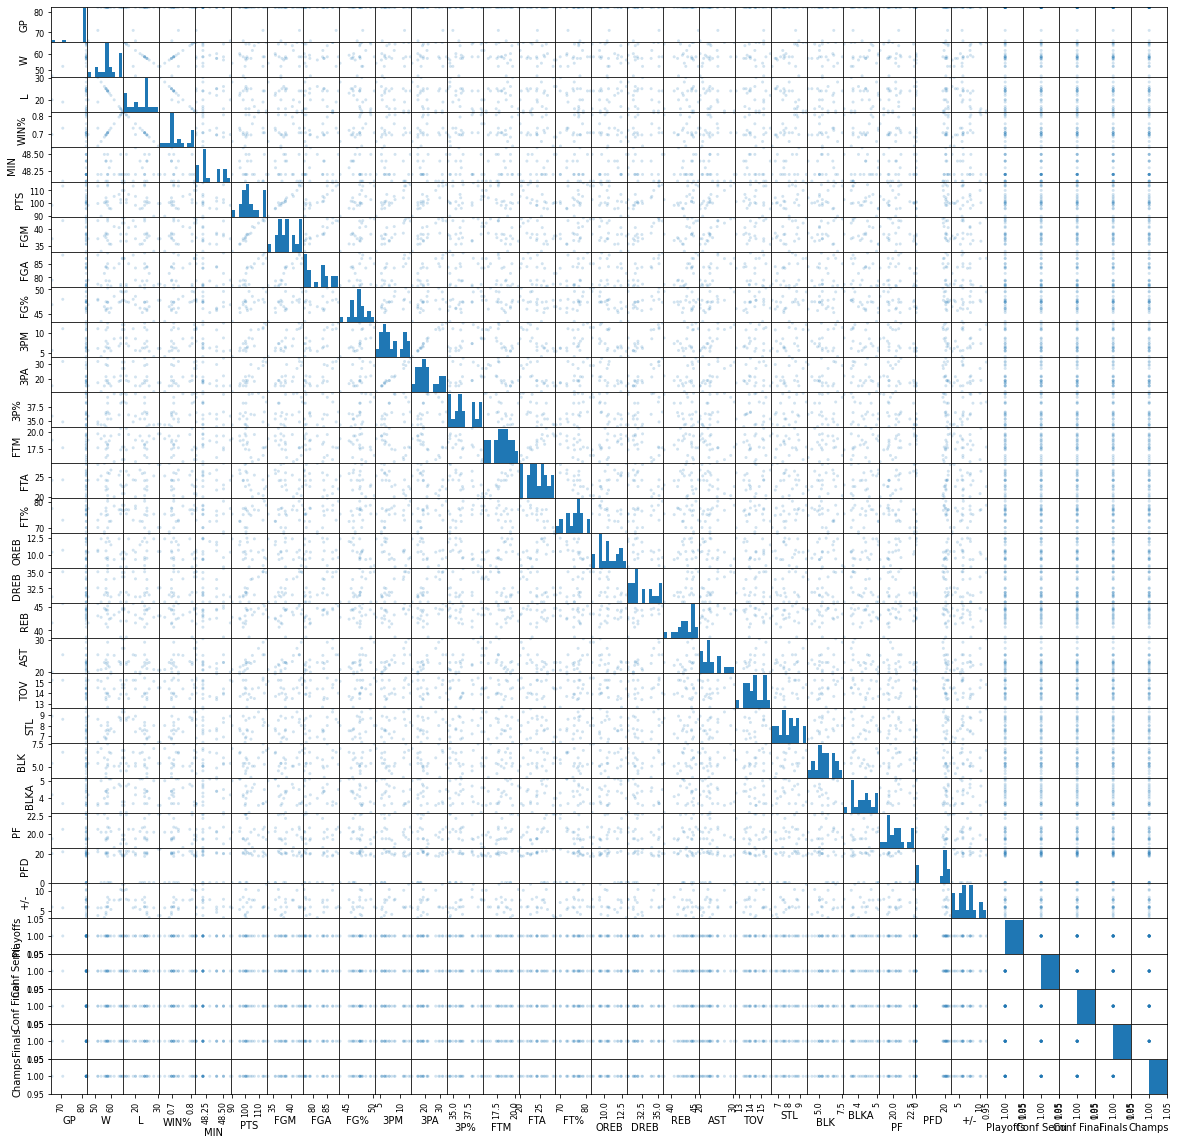

In [9]:
scatter_matrix(df_champs, alpha=0.2, figsize = (20, 20))
print()

In [10]:
# Compute the correlation of all the variables
corr_champs = df_champs.corr()
corr_champs.head()

GP         W         L      WIN%       MIN       PTS       FGM  \
GP    1.000000  0.621940  0.175083  0.105937 -0.247667 -0.051618 -0.065275   
W     0.621940  1.000000 -0.662079  0.844446 -0.258167  0.320719  0.298225   
L     0.175083 -0.662079  1.000000 -0.960341  0.087565 -0.452643 -0.437432   
WIN%  0.105937  0.844446 -0.960341  1.000000 -0.164975  0.444930  0.425122   
MIN  -0.247667 -0.258167  0.087565 -0.164975  1.000000 -0.218769 -0.229027   

           FGA       FG%       3PM  ...       BLK      BLKA        PF  \
GP   -0.073819 -0.020725  0.028034  ... -0.079156  0.138023  0.114878   
W     0.163030  0.380101  0.335146  ... -0.039620 -0.016589 -0.153279   
L    -0.275627 -0.497738 -0.394551  ... -0.025941  0.152952  0.302663   
WIN%  0.260825  0.495526  0.408603  ...  0.008396 -0.115419 -0.270124   
MIN  -0.163476 -0.218472 -0.207978  ... -0.215961  0.150097  0.011788   

           PFD       +/-  Playoffs  Conf Semi  Conf Final  Finals  Champs  
GP   -0.198781  0.135047       NaN        NaN         NaN     NaN     NaN  
W     0.106346  0.726182       NaN        NaN         NaN     NaN     NaN  
L    -0.323953 -0.783786       NaN        NaN         NaN     NaN     NaN  
WIN%  0.269160  0.827806       NaN        NaN         NaN     NaN     NaN  
MIN  -0.139957 -0.285416       NaN        NaN         NaN     NaN     NaN  

[5 rows x 31 columns]

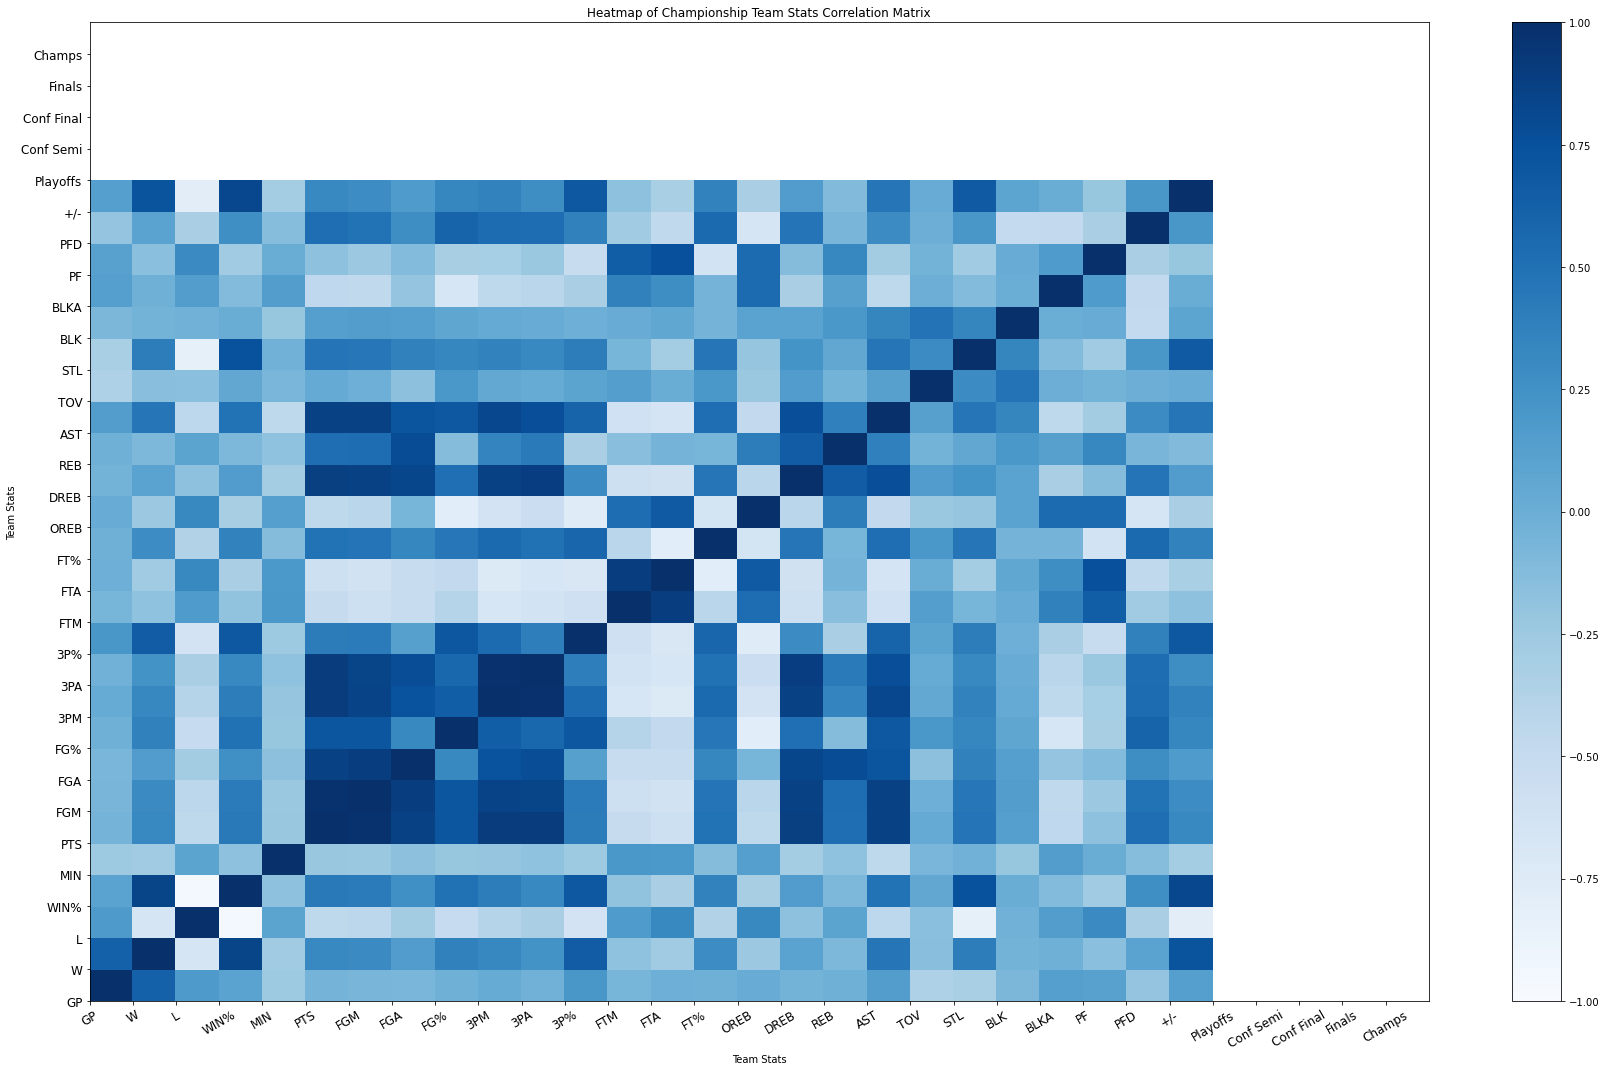

In [11]:
# Heat Map
names = corr.columns.to_list()
fig_hm = plt.figure(figsize=(30, 18))
heatmap = plt.pcolor(corr_champs, vmin=-1, vmax=1, cmap=plt.cm.Blues)
plt.xticks(range(corr.shape[0]), labels=names, rotation=30, fontsize='large')
plt.yticks(range(corr.shape[0]), labels=names, fontsize='large')
plt.title("Heatmap of Championship Team Stats Correlation Matrix")
plt.xlabel("Team Stats")
plt.ylabel("Team Stats")
plt.colorbar(heatmap)
plt.show()

## Perform SVM Classification ##

In [46]:
# Develop a classification model for championship contenders
# First need to create a single column that defines the final category for each team, based off their playoff result
df_all['True'] = 0
df_all['True']
df_all.loc[(df_all['Champs'] == 1), 'True'] = 5
df_all.loc[(df_all['Finals'] == 1) & (df_all['Champs'] != 1), 'True'] = 4
df_all.loc[(df_all['Conf Final'] == 1) & (df_all['Finals'] != 1), 'True'] = 3
df_all.loc[(df_all['Conf Semi'] == 1) &(df_all['Conf Final'] != 1), 'True'] = 2
df_all.loc[(df_all['Playoffs'] == 1) & (df_all['Conf Semi'] != 1), 'True'] = 1

# Exclude the 2020-21 season (we want to use the model to predict those later)
df_00_20 = df_all.loc[df_all['SEASON'] != '2020-21']
df_20_21 = df_all.loc[df_all['SEASON'] == '2020-21']

# Move stat data to an array
X_all = df_00_20.loc[:, 'GP':'+/-'].values
y_true = df_00_20['True']

#df_00_20.head(30)

In [13]:
# A function that develops, optimizes, and tests an SVM model

def dev_test_svm(X, y, svm_name='all'):
    # Cross-val function to find the best c-value.
    Cs = range(1, 150, 1)
    acc_list = np.zeros(len(Cs))

    for ii, val in enumerate(Cs):
        svm_optimize = svm.SVC(kernel='rbf', C=val)
        scores = cross_val_score(estimator=svm_optimize, X=X, y=y, cv=5, scoring='accuracy')
        acc_list[ii] = scores.mean()

    plt.plot(Cs, acc_list)
    plt.xlabel('C-value')
    plt.ylabel('Accuracy')
    plt.show()

    # Identify maximum C value
    np.max(acc_list)
    max_C_index = np.where(acc_list == np.max(acc_list))[0][0]
    max_C = Cs[max_C_index]
    print(max_C)
    
    # Create an SVM model using the ideal C value

    # Split data into test and training values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.42)

    # Train an SVM model
    if svm_name == 'all':
        svm_all = svm.SVC(kernel='rbf', C=max_C)
    elif svm_name == 'playoffs':
        svm_playoff = svm.SVC(kernel='rbf', C=max_C)
    else:
        svm_conf_semi = svm.SVC(kernel='rbf', C=max_C)
        
    
    # Train Model
    if svm_name == 'all':
        svm_all.fit(X_train, y_train)
    elif svm_name == 'playoffs':
        svm_playoff.fit(X_train, y_train)
    else:
        svm_conf_semi.fit(X_train, y_train)
        
    # Test Model
    if svm_name == 'all':
        print('svm_all')
        pred = svm_all.predict(X_test)
    elif svm_name == 'playoffs':
        print('playoffs')
        pred = svm_playoff.predict(X_test)
    else:
        print('conference semi')
        pred = svm_conf_semi.predict(X_test)
        
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_true = y_test, y_pred = pred))
    print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = pred))
    return svm_all

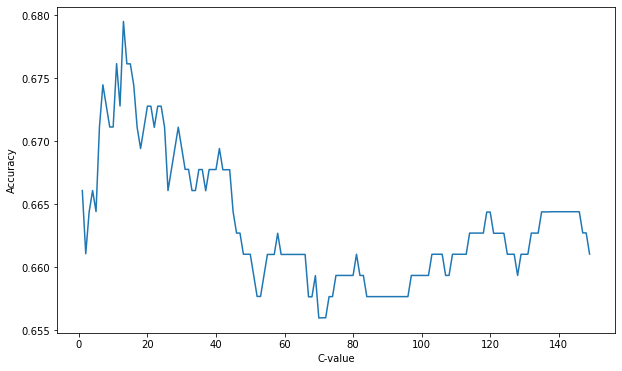

13
svm_all
Confusion Matrix:
 [[100  11   0   0   0   0]
 [  6  56   3   1   0   0]
 [  0  23  10   1   0   0]
 [  0   5  10   1   0   0]
 [  0   6   5   0   0   0]
 [  0   1  10   2   0   0]]
Accuracy =  0.6653386454183267


In [14]:
# Do SVM classification for all playoff results
svm_all = dev_test_svm(X_all, y_true, 'all')

[0.9009009009009009, 0.8484848484848485, 0.29411764705882354, 0.0625, 0, 0]


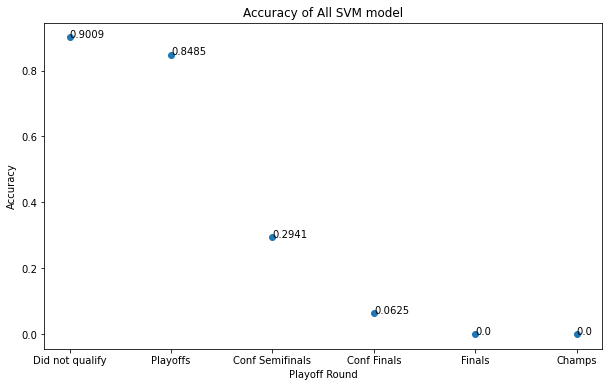

In [12]:
# Plot the results of the all SVM
plot_data= {'Did not qualify': 100/(100+11) , 'Playoffs': 56/(6+56+3+1) , 'Conf Semifinals': 10/(23+10+1), 
            'Conf Finals': 1/(5+10+1), 'Finals': 0, 'Champs': 0 }
names = list(plot_data.keys())
values = list(plot_data.values())
print(values)
fig, ax = plt.subplots ()
ax.scatter(names, values)
for i, txt in enumerate(values):
    ax.annotate(float("{:.4f}".format(txt)), (names[i], values[i]))
plt.ylabel('Accuracy')
plt.xlabel('Playoff Round')
plt.title('Accuracy of All SVM model')
plt.show()

**COMMENTS** This SVM model displays an accuracy of 0.665 on test dataset. This is a decent value, it predicts the correct playoff outcome for a team about 70% of the time. The downside is, the error of the model increases as it tries to predict teams that will make it the farthest in the playoffs. For example, it only predicted the  correct championship team once.

<br>
If we take a deeper look at the confusion matrix, we can learn some nuances about the model. It is pretty good at predicting teams that won't make the playoffs. It is also really good at predicting teams that will qualify for the first round of the playoffs. After that, it's accuracy drops pretty significantly (29% accurate for predicting the conference semis, 6.25% accurate for conference finals, 0% for finals and 0% for champions)

<br>

The poor accuracy of predicting the deepest rounds of the playoffs can most likely be attributed to a lack of data. Consider that over the last 20 years, only 20 teams have won the championship, only 40 teams made it to the finals. With such a small sample size, it is understandable that

## Examine the accuracies of separate rounds of the playoffs ##

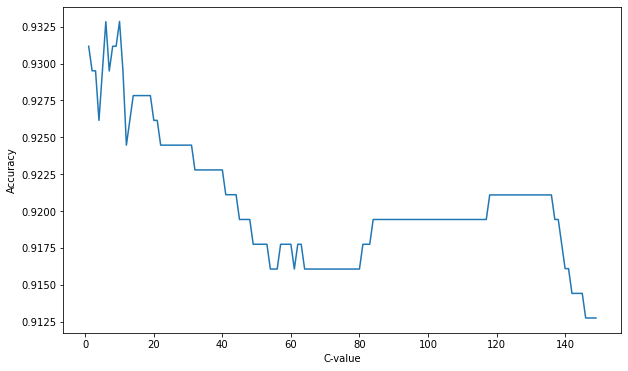

10
svm_all
Confusion Matrix:
 [[ 99  12]
 [  3 137]]
Accuracy =  0.9402390438247012


In [35]:
# SVM classification for first round of playoffs
svm_playoffs = dev_test_svm(X_all, df_00_20['Playoffs'], 'all')

[0.8918918918918919, 0.9856115107913669]


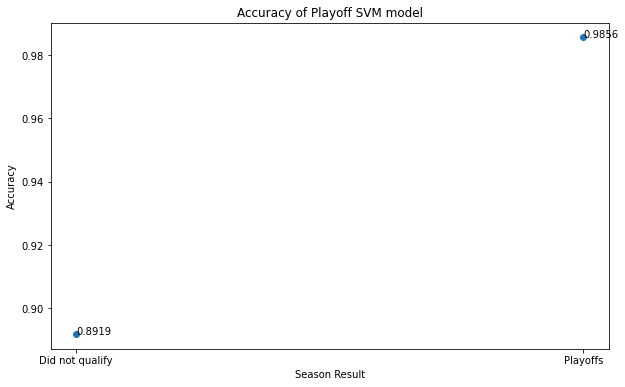

In [13]:
# Plot the results of the playoffs SVM
plot_data= {'Did not qualify': 99/(99+12), 'Playoffs':(137/(137+2)) }
names = list(plot_data.keys())
values = list(plot_data.values())
print(values)
fig, ax = plt.subplots ()
ax.scatter(names, values)
for i, txt in enumerate(values):
    ax.annotate(float("{:.4f}".format(txt)), (names[i], values[i]))
plt.ylabel('Accuracy')
plt.xlabel('Season Result')
plt.title('Accuracy of Playoff SVM model')
plt.show()

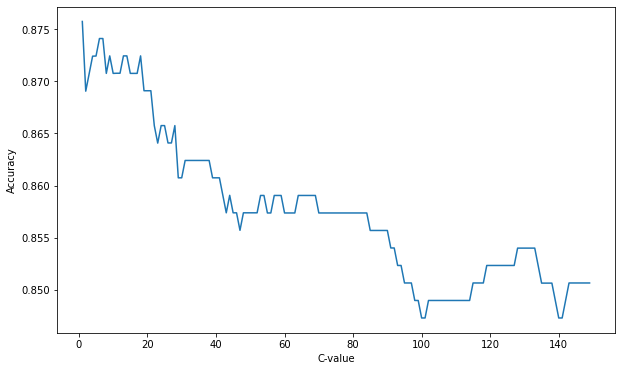

1
svm_all
Confusion Matrix:
 [[169   8]
 [ 27  47]]
Accuracy =  0.8605577689243028


In [36]:
# SVM classification for second round (conference semis) of playoffs
svm_conf_semi = dev_test_svm(X_all, df_00_20['Conf Semi'], 'all')

[0.9548022598870056, 0.6351351351351351]


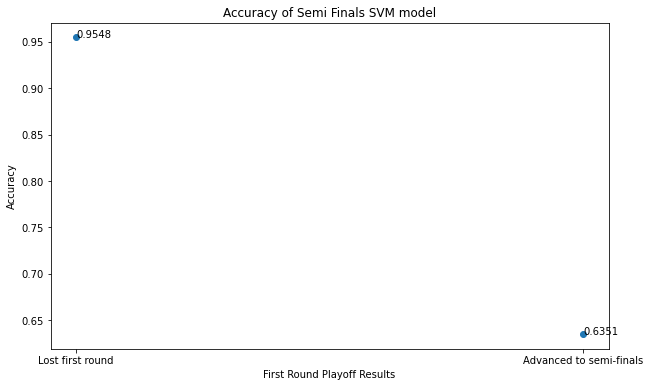

In [14]:
# Plot the results of the all-NBA SVM
plot_data= {'Lost first round': 169/(169+8) , 'Advanced to semi-finals': 47/(47+27)}
names = list(plot_data.keys())
values = list(plot_data.values())
print(values)
fig, ax = plt.subplots ()
ax.scatter(names, values)
for i, txt in enumerate(values):
    ax.annotate(float("{:.4f}".format(txt)), (names[i], values[i]))
plt.ylabel('Accuracy')
plt.xlabel('First Round Playoff Results')
plt.title('Accuracy of Semi Finals SVM model')
plt.show()

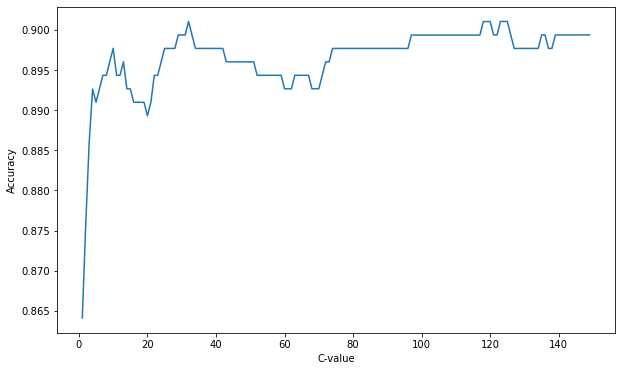

32
svm_all
Confusion Matrix:
 [[204   7]
 [ 22  18]]
Accuracy =  0.8844621513944223


In [37]:
# SVM classification for conference finals
svm_conf_final = dev_test_svm(X_all, df_00_20['Conf Final'], 'all')

[0.966824644549763, 0.45]


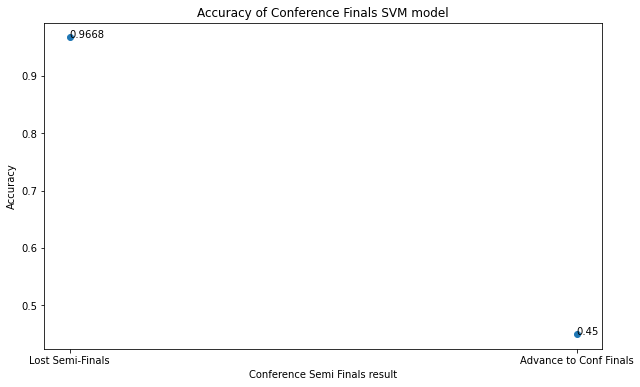

In [15]:
# Plot the results of the all-NBA SVM
plot_data= {'Lost Semi-Finals': 204/(204+7) , 'Advance to Conf Finals': 18/(22+18)}
names = list(plot_data.keys())
values = list(plot_data.values())
print(values)
fig, ax = plt.subplots ()
ax.scatter(names, values)
for i, txt in enumerate(values):
    ax.annotate(float("{:.4f}".format(txt)), (names[i], values[i]))
plt.ylabel('Accuracy')
plt.xlabel('Conference Semi Finals result')
plt.title('Accuracy of Conference Finals SVM model')
plt.show()

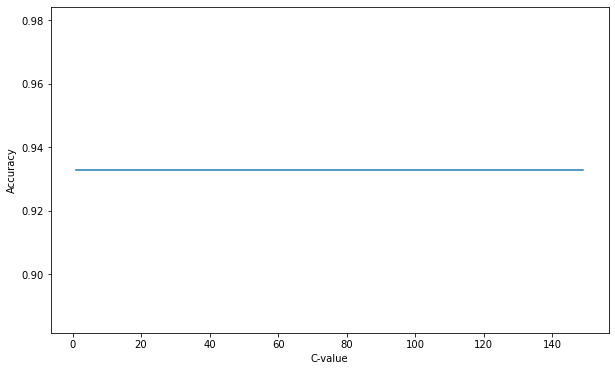

1
svm_all
Confusion Matrix:
 [[227   0]
 [ 24   0]]
Accuracy =  0.9043824701195219


In [38]:
# SVM classification for finals
svm_finals = dev_test_svm(X_all, df_00_20['Finals'], 'all')

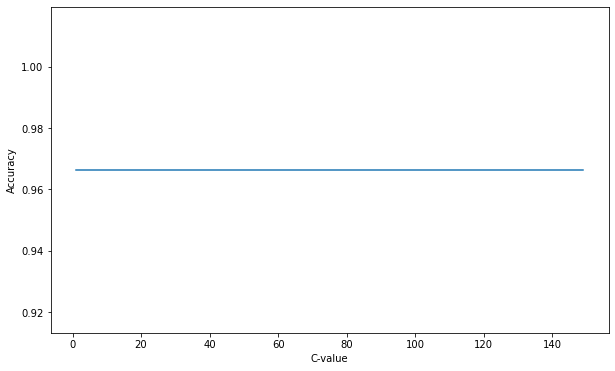

1
svm_all
Confusion Matrix:
 [[238   0]
 [ 13   0]]
Accuracy =  0.9482071713147411


In [39]:
# SVM classification for champs
svm_champs = dev_test_svm(X_all, df_00_20['Champs'], 'all')

**Comments:** Unsurprisingly, as we try to create classification models for later rounds of the playoffs, the accuracy sharply dropps off. For Finals and Champs, the SVM correctly guessed zero teams would reach that point. 

# Predict results for the Utah Jazz using above SVMs #

In [17]:
X_utah = df_20_21.loc[df_20_21['TEAM'] == 'Utah Jazz'].loc[:, 'GP':'+/-'].values
print('Prediction for Utah Jazz using mega classifier: ', svm_all.predict(X_utah)[0])

NameError: name 'df_20_21' is not defined

[10, 10, 3, 3, 3]


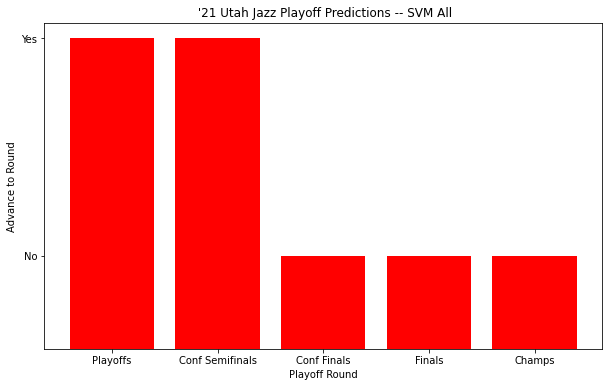

In [30]:
# Plot results
plot_data= {'Playoffs': 10 , 'Conf Semifinals': 10, 
            'Conf Finals': 3, 'Finals': 3, 'Champs': 3 }
names = list(plot_data.keys())
values = list(plot_data.values())
print(values)
fig, ax = plt.subplots ()
ax.bar(names, values, color='red')
plt.ylabel('Advance to Round')
plt.xlabel('Playoff Round')
plt.title(' \'21 Utah Jazz Playoff Predictions -- SVM All')
plt.yticks([10, 3], ['Yes', 'No'])
plt.show()


In [42]:
print('Predictions for 2021 Utah Jazz playoff performance using individual playoff round classifiers: \n')
print('Will make playoffs: ', svm_playoffs.predict(X_utah)[0])
print('Will make second round: ', svm_conf_semi.predict(X_utah)[0])
print('Will reach conference finals: ', svm_conf_final.predict(X_utah)[0])
print('Will reach finals: ', svm_finals.predict(X_utah)[0])
print('Will get a ring: ', svm_champs.predict(X_utah)[0])

Predictions for 2021 Utah Jazz playoff performance using individual playoff round classifiers: 

Will make playoffs:  1
Will make second round:  1
Will reach conference finals:  1
Will reach finals:  0
Will get a ring:  0


In [34]:
# Compile all Results into one final table

results_dict = {'SVM Model': ['All', 'Individual'], 'Playoffs': ['Yes', 'Yes'], 'Conf Semis': ['Yes', 'Yes'], 
                'Conf Finals': ['No', 'Yes'], 'Finals': ['No', 'No'],
               'Champions': ['No', 'No']}
df_results = pd.DataFrame(results_dict)
df_results.head()


SVM Model Playoffs Conf Semis Conf Finals Finals Champions
0         All      Yes        Yes          No     No        No
1  Individual      Yes        Yes         Yes     No        No